In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


In [3]:
try:
    data = pd.read_csv('flipkart_com-ecommerce_sample.csv', sep='\t')
except pd.errors.ParserError:
    # If there is an error, try reading with other common delimiters
    data = pd.read_csv('flipkart_com-ecommerce_sample.csv', sep=',')
except Exception as e:
    print("Error:", e)
    exit(1)

# Convert crawl_timestamp column to datetime format
data['crawl_timestamp'] = pd.to_datetime(data['crawl_timestamp'])

# Continue with the rest of the data analysis and visualization code...
# Display basic information about the data
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   uniq_id                  20000 non-null  object             
 1   crawl_timestamp          20000 non-null  datetime64[ns, UTC]
 2   product_url              20000 non-null  object             
 3   product_name             20000 non-null  object             
 4   product_category_tree    20000 non-null  object             
 5   pid                      20000 non-null  object             
 6   product_price            19922 non-null  float64            
 7   discounted_price         19922 non-null  float64            
 8   image                    19997 non-null  object             
 9   is_FK_Advantage_product  20000 non-null  bool               
 10  description              19998 non-null  object             
 11  product_rating           200

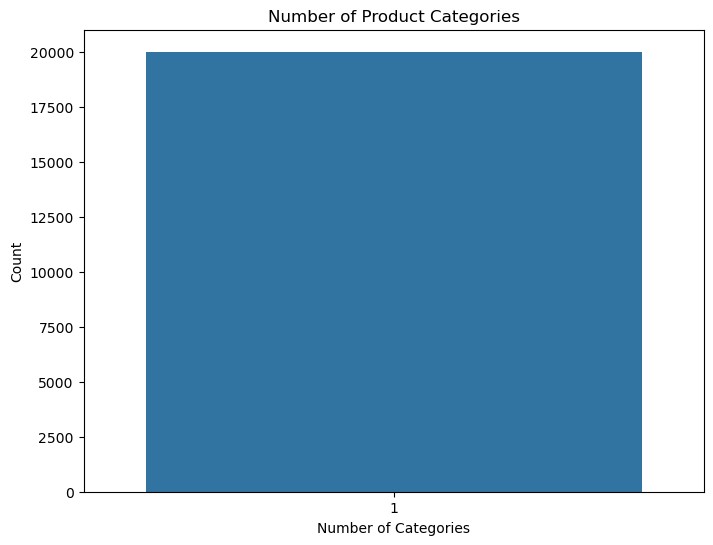

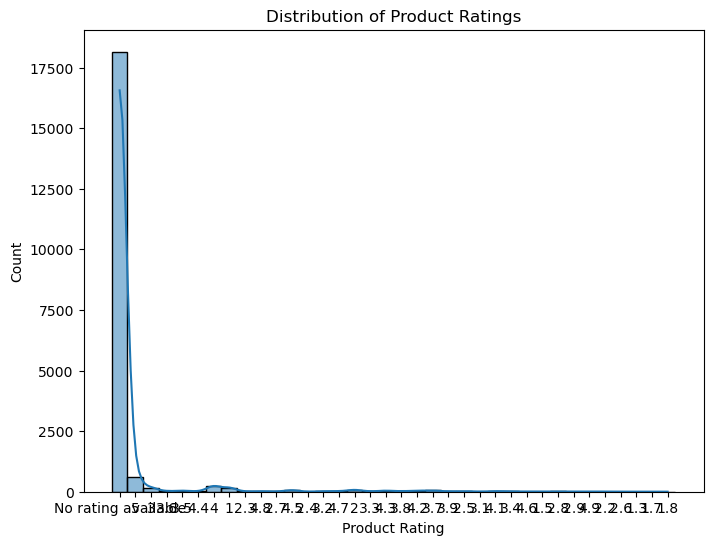

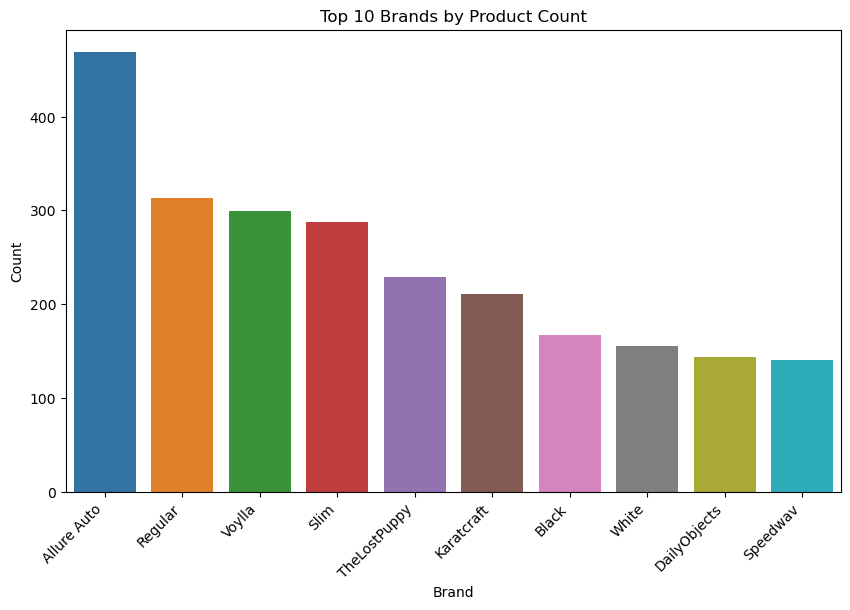

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Product Categories Count
category_count = data['product_category_tree'].apply(lambda x: len(eval(x))).value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=category_count.index, y=category_count.values)
plt.xlabel('Number of Categories')
plt.ylabel('Count')
plt.title('Number of Product Categories')
plt.show()

# Visualization 2: Product Ratings Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['product_rating'], bins=20, kde=True)
plt.xlabel('Product Rating')
plt.ylabel('Count')
plt.title('Distribution of Product Ratings')
plt.show()

# Visualization 3: Brand-wise Product Count
top_brands = data['brand'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Top 10 Brands by Product Count')
plt.xticks(rotation=45, ha='right')
plt.show()
